In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація даних
x_train, x_test = x_train / 255.0, x_test / 255.0

# Параметри нейронної мережі
learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100
n_hidden_1 = 128
n_hidden_2 = 256
num_input = 784  # 28*28 - розмір зображення

# Конвертація даних у формат, зрозумілий нейронній мережі
x_train = x_train.reshape(-1, num_input)
x_test = x_test.reshape(-1, num_input)

# Конвертація міток у формат one-hot encoding
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Створення входу та вихідних даних для моделі
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

In [4]:
# Створення моделі
class NeuralNet(tf.keras.Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.relu)
        self.fc2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.relu)
        self.out = tf.keras.layers.Dense(10, activation=None)

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return self.out(x)

neural_net = NeuralNet()

In [5]:
# Функція втрат та оптимізатор
def cross_entropy_loss(x, y):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, neural_net(x)))

optimizer = tf.optimizers.Adam(learning_rate)

# Функція для оптимізації та обчислення точності
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
# Графіки функції втрат та точності
loss_list = []
accuracy_list = []
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    with tf.GradientTape() as g:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(batch_x, pred)

    trainable_variables = neural_net.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

    if step % display_step == 0:
        acc = accuracy(pred, batch_y)
        loss_list.append(loss)
        accuracy_list.append(acc)
        print(f"Step: {step}, Loss: {loss}, Accuracy: {acc}")

Step: 100, Loss: -379724864.0, Accuracy: 0.1171875
Step: 200, Loss: -46927101952.0, Accuracy: 0.09375
Step: 300, Loss: -640632815616.0, Accuracy: 0.1171875
Step: 400, Loss: -3476113326080.0, Accuracy: 0.125
Step: 500, Loss: -11464662319104.0, Accuracy: 0.08203125
Step: 600, Loss: -33199157673984.0, Accuracy: 0.0859375
Step: 700, Loss: -67483960606720.0, Accuracy: 0.08203125
Step: 800, Loss: -133769231073280.0, Accuracy: 0.0859375
Step: 900, Loss: -222805891219456.0, Accuracy: 0.08984375
Step: 1000, Loss: -428735547310080.0, Accuracy: 0.08984375
Step: 1100, Loss: -680341543059456.0, Accuracy: 0.12109375
Step: 1200, Loss: -980636730916864.0, Accuracy: 0.09375
Step: 1300, Loss: -1406664066465792.0, Accuracy: 0.13671875
Step: 1400, Loss: -2152391185006592.0, Accuracy: 0.09375
Step: 1500, Loss: -2697647483781120.0, Accuracy: 0.09375
Step: 1600, Loss: -3660145896718336.0, Accuracy: 0.0859375
Step: 1700, Loss: -4637361015095296.0, Accuracy: 0.078125
Step: 1800, Loss: -5803533219659776.0, Accu

In [7]:
# Обчислення та виведення точності на тестовому наборі даних
test_pred = neural_net(x_test)
test_acc = accuracy(test_pred, y_test)
print(f"Точність на тесті: {test_acc}")

Точність на тесті: 0.10000000149011612


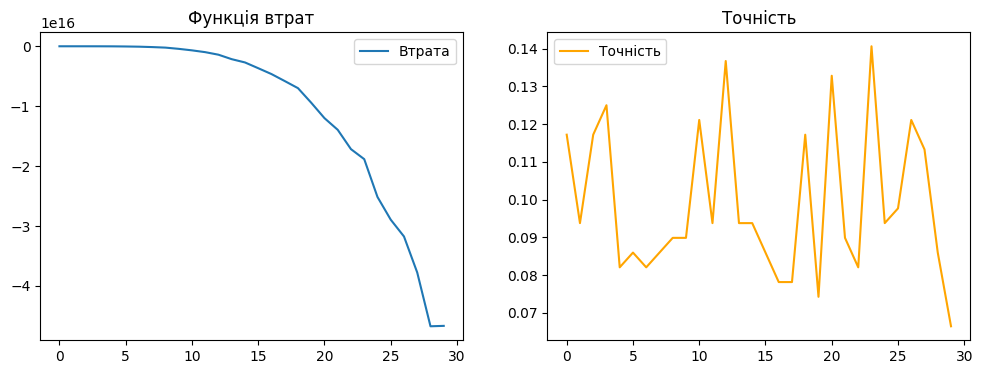

In [9]:
# Побудова графіків функції втрат та точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_list, label='Втрата')
plt.title('Функція втрат')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_list, label='Точність', color='orange')
plt.title('Точність')
plt.legend()

plt.show()

True: 5 Predict: 4 False
True: 2 Predict: 4 False
True: 8 Predict: 4 False
True: 5 Predict: 4 False
True: 3 Predict: 4 False
True: 6 Predict: 4 False
True: 3 Predict: 4 False
True: 4 Predict: 4 True
True: 6 Predict: 4 False
True: 5 Predict: 4 False


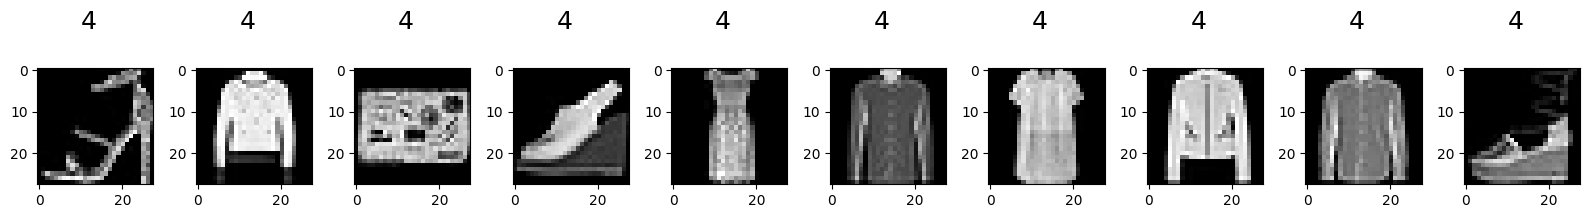

In [16]:
test_img = np.random.permutation(x_test.shape[0])[:10]
y_test_true = tf.argmax(y_test, axis=1).numpy()[test_img]
pred_data = [np.argmax(x) for x in neural_net(x_test[test_img])]

plt.figure(figsize=(16, 6))
for i in range(10):
    print(f"True: {y_test_true[i]} Predict: {pred_data[i]} {True if y_test_true[i] - pred_data[i] == 0 else False}")
    plt.subplot(1, 10, (i + 1))
    plt.imshow(x_test[test_img[i]].reshape(28, 28), cmap='gray')
    plt.text(x=10, y=-10, s=pred_data[i], fontsize=18)

plt.tight_layout()
plt.show()

Предбачення: 4, Настоящий клас: 5
Предбачення: 4, Настоящий клас: 9
Предбачення: 4, Настоящий клас: 2
Предбачення: 4, Настоящий клас: 1
Предбачення: 4, Настоящий клас: 1
Предбачення: 4, Настоящий клас: 6
Предбачення: 4, Настоящий клас: 1
Предбачення: 4, Настоящий клас: 4
Предбачення: 4, Настоящий клас: 6
Предбачення: 4, Настоящий клас: 5
Предбачення: 4, Настоящий клас: 7
Предбачення: 4, Настоящий клас: 4


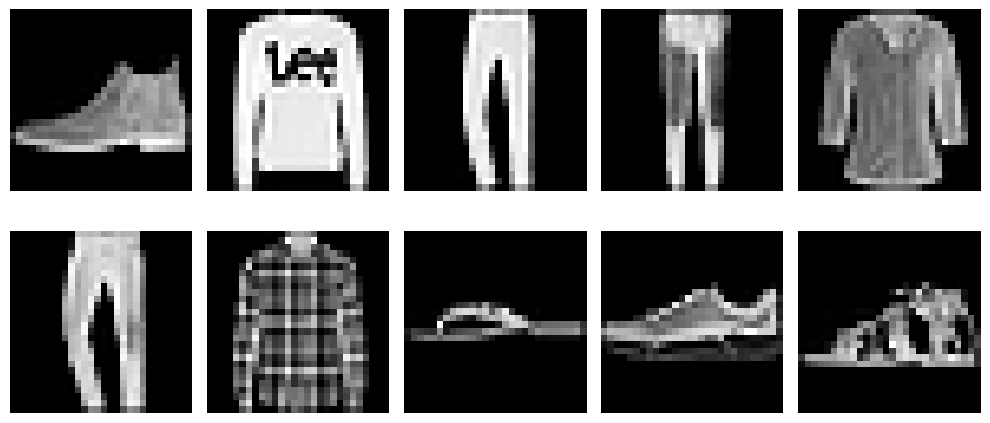

In [19]:
wrong_predictions = []
count = 0
for i in range(len(x_test)):
    print(f"Предбачення: {predicted_class}, Настоящий клас: {actual_class}")
    prediction = neural_net(tf.expand_dims(x_test[i], axis=0))
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]
    actual_class = tf.argmax(y_test[i]).numpy()
    if predicted_class != actual_class:
        wrong_predictions.append((x_test[i], predicted_class, actual_class))
        count += 1
    if count == 10:
        break

plt.figure(figsize=(10, 5))
for i, (image, predicted_class, actual_class) in enumerate(wrong_predictions):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

**Висновок**

Моя модель нейронної мережі, побудована для класифікації Fashion MNIST, показала низьку точність на тестовому наборі даних (приблизно 10%). Це означає, що з 10 випадкових зображень лише одне було правильно розпізнане моделлю, що свідчить про недостатню ефективність моделі у вирішенні цієї задачі класифікації.